In [1]:
# Author: Roi Yehoshua <roiyeho@gmail.com>
# Date: March 2025
# License: MIT

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Chebyshev's Inequality

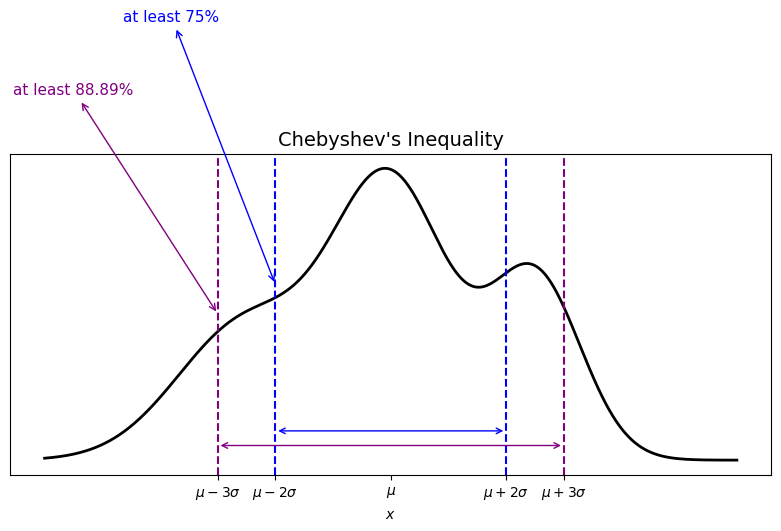

In [3]:
# Create a general, arbitrary (non-normal) distribution shape
x = np.linspace(-6, 6, 1000)
y = (
    0.3 * np.exp(-0.5 * ((x + 2.5) / 1.2)**2) +
    0.6 * np.exp(-0.5 * (x / 1.0)**2) +
    0.4 * np.exp(-0.5 * ((x - 2.5) / 0.8)**2)
)
y /= np.trapz(y, x)  # Normalize

# Plot
plt.figure(figsize=(8, 6))
plt.plot(x, y, color='black', lw=2)

# Mean and std dev (assumed standard to match labeling)
mu = 0
sigma = 1

# Vertical lines for ±2σ and ±3σ
for k, color in zip([2, 3], ['blue', 'purple']):
    plt.axvline(mu - k * sigma, color=color, linestyle='--')
    plt.axvline(mu + k * sigma, color=color, linestyle='--')

# Arrows and labels
plt.annotate('at least 75%', xy=(-2, 0.12), xytext=(-3.8, 0.3),
             arrowprops=dict(arrowstyle='<->', color='blue'),
             fontsize=11, color='blue', ha='center')

plt.annotate('at least 88.89%', xy=(-3, 0.1), xytext=(-5.5, 0.25),
             arrowprops=dict(arrowstyle='<->', color='purple'),
             fontsize=11, color='purple', ha='center')

plt.annotate('', xy=(mu - 2 * sigma, 0.02), xytext=(mu + 2 * sigma, 0.02),
             arrowprops=dict(arrowstyle='<->', color='blue'))
plt.annotate('', xy=(mu - 3 * sigma, 0.01), xytext=(mu + 3 * sigma, 0.01),
             arrowprops=dict(arrowstyle='<->', color='purple'))

plt.xticks([-3, -2, 0, 2, 3], [r'$\mu - 3\sigma$', r'$\mu - 2\sigma$', r'$\mu$', r'$\mu + 2\sigma$', r'$\mu + 3\sigma$'])
plt.yticks([])
plt.title("Chebyshev's Inequality", fontsize=14)
plt.xlabel('$x$')
plt.tight_layout()
plt.savefig('figures/chebyshev_inequality.pdf', bbox_inches='tight')

Hoeffding's Inequality

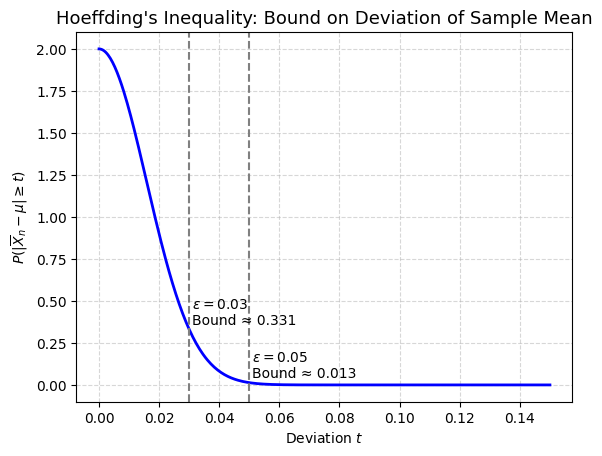

In [4]:
# Range of t
t_vals = np.linspace(0, 0.15, 400)

# Hoeffding bound for n = 1000, a = 0, b = 1
n = 1000
a = 0
b = 1
bound_vals = 2 * np.exp(-2 * n * t_vals**2 / (b - a)**2)

# Plot
plt.plot(t_vals, bound_vals, color='blue', lw=2)
plt.title("Hoeffding's Inequality: Bound on Deviation of Sample Mean", fontsize=13)
plt.xlabel(r'Deviation $t$')
plt.ylabel(r'$P(|\overline{X}_n - \mu| \geq t)$')
plt.grid(True, linestyle='--', alpha=0.5)

# Mark epsilon = 0.03 and 0.05
epsilons = [0.03, 0.05]
for eps in epsilons:
    bound = 2 * np.exp(-2 * n * eps**2)
    plt.axvline(eps, linestyle='--', color='gray')
    plt.text(eps + 0.001, bound + 0.01, f'$\\epsilon = {eps}$\nBound ≈ {bound:.3f}',
             ha='left', va='bottom', fontsize=10)

plt.savefig('figures/hoeffding_inequality.pdf')

Chernoff Bounds

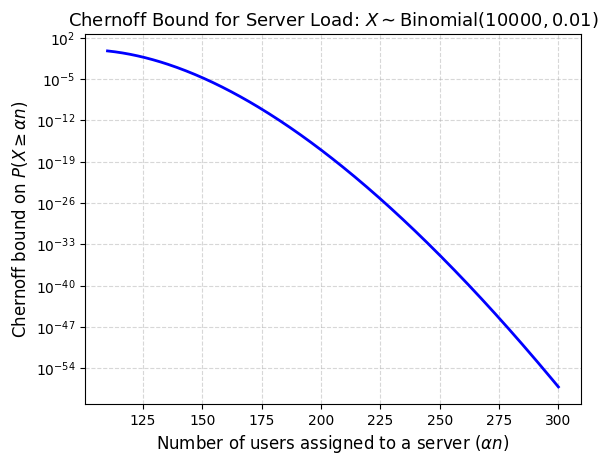

In [5]:
# Parameters
n = 10000
p = 0.01
mu = n * p

# Range of alpha values (above p)
alpha_vals = np.linspace(0.011, 0.03, 300)
probs = []

# Compute Chernoff bound for each alpha
for alpha in alpha_vals:
    term1 = (p / alpha) ** alpha
    term2 = ((1 - p) / (1 - alpha)) ** (1 - alpha)
    bound = (term1 * term2) ** n
    probs.append(bound)

# Plot
plt.plot(alpha_vals * n, probs, lw=2, color='blue')
plt.yscale('log')
plt.xlabel(r'Number of users assigned to a server ($\alpha n$)', fontsize=12)
plt.ylabel(r'Chernoff bound on $P(X \geq \alpha n)$', fontsize=12)
plt.title(r'Chernoff Bound for Server Load: $X \sim \mathrm{Binomial}(10000, 0.01)$', fontsize=13)
plt.grid(True, linestyle='--', alpha=0.5)
plt.savefig('figures/chernoff_bound.pdf')